<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/medicon_statistics_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [2]:
doses = pd.read_csv('doses.csv')
doses.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


In [4]:
doses.shape

(50, 2)

In [5]:
n= 10
p = 0.33
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
from scipy.stats import binom
binomial = binom.pmf(k, n,p)
binomial

array([1.82283780e-02, 8.97815635e-02, 1.98993465e-01, 2.61364552e-01,
       2.25280640e-01, 1.33150945e-01, 5.46515074e-02, 1.53816609e-02,
       2.84101573e-03, 3.10956945e-04, 1.53157899e-05])

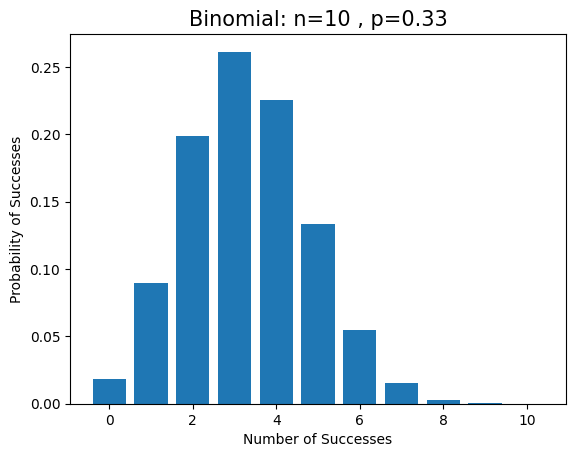

In [7]:
# plot the distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
plt.show() # display the plot

Probability that exactly 3 doses will not be able to do a satisfactory job

In [9]:
binomial[3]

0.2613645515525908

Probability that at most 3 doses will not be able to do a satisfactory job

In [11]:
binom.cdf(k =3, n = n, p = p)

0.5683679584925142

##**Q2**

In [12]:
n = 20
k = np.arange(0,21)
p = 0.33
binomial = binom.pmf(k = k, n = n, p = p)

In [13]:
binomial

array([3.32273766e-04, 3.27314456e-03, 1.53153854e-02, 4.52603926e-02,
       9.47428368e-02, 1.49326023e-01, 1.83871596e-01, 1.81127244e-01,
       1.44969380e-01, 9.52037718e-02, 5.15805510e-02, 2.30957691e-02,
       8.53164605e-03, 2.58594094e-03, 6.36836201e-04, 1.25466237e-04,
       1.93115010e-05, 2.23803172e-06, 1.83719022e-07, 9.52510246e-09,
       2.34573419e-10])

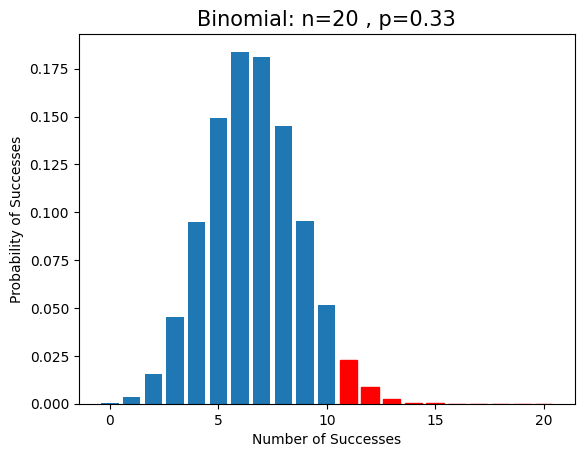

In [17]:
# plot the distribution
barl = plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
for i in range(11,21):
  barl[i].set_color('r')
plt.show() # display the plot

In [21]:
prob_atleast11 = 1 - binom.cdf(k = 10, n = n, p = p)

In [22]:
prob_atleast11

0.03499740152648401

In [23]:
doses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [24]:
mu = doses['time_of_effect'].mean()
sigma = doses['time_of_effect'].std()
print('mu', mu)
print('sigma', sigma)

mu 13.442
sigma 4.745528077537196


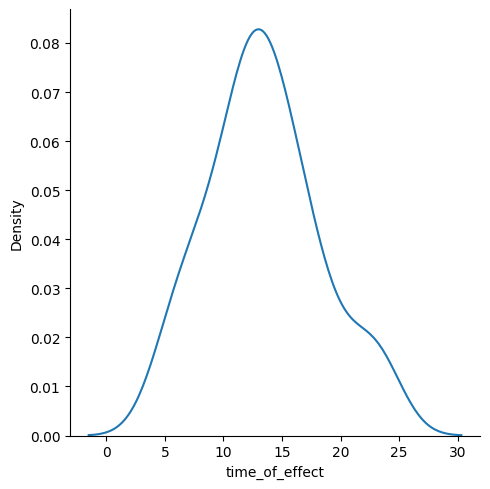

In [28]:
sns.displot(doses['time_of_effect'], kind = 'kde')
plt.show()

In [36]:
from scipy.stats import norm
take_less_than_11point5 = norm.cdf(11.5, loc = mu, scale = sigma)
print('The probability the a dose will take less than 11 and a half hours to completely cure covid is', round(take_less_than_11point5*100),'%')

The probability the a dose will take less than 11 and a half hours to completely cure covid is 34 %


What is the 90th percentile of the time of effect for doses

In [39]:
ninetieth_percentile = norm.ppf(0.9, mu,sigma)
round(ninetieth_percentile,2)

19.52

In [40]:
# import the required function
from scipy.stats import t

# set the values of sample mean and sample standard deviation
x_bar, s = mu, sigma

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)

array([12.09, 14.79])